In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/audio_data.csv")
print(len(df))
df.head()

1128


,zcr_mean,zcr_min,zcr_max,spectral_centroid_mean,spectral_centroid_min,spectral_centroid_max,spectral_spread_mean,spectral_spread_min,spectral_spread_max,mfcc_1_mean,...,chroma_11_mean,chroma_11_min,chroma_11_max,chroma_12_mean,chroma_12_min,chroma_12_max,index,seconds,amplitude_avg,movie
0,0.039661,0.015423,0.100042,0.129571,0.091528,0.187132,0.185872,0.141644,0.239419,-23.952525,...,0.008338,0.000916,0.066829,0.003212,0.000113,0.033261,0,0,1365.0,Parasite
1,0.145052,0.025010,0.186744,0.224690,0.068830,0.268133,0.218356,0.124551,0.241955,-28.948416,...,0.013627,0.002727,0.051621,0.007620,0.000288,0.073504,1,10,3624.0,Parasite
2,0.045088,0.010421,0.192997,0.108547,0.049090,0.238908,0.154908,0.090841,0.215006,-24.589690,...,0.018174,0.000830,0.079917,0.003252,0.000023,0.023815,2,20,4804.0,Parasite
3,0.055622,0.030846,0.133389,0.109721,0.080291,0.214177,0.147349,0.109280,0.187904,-22.932538,...,0.036024,0.003356,0.079372,0.005562,0.000526,0.030311,3,30,2569.5,Parasite
4,0.043603,0.019591,0.082534,0.124439,0.086293,0.188828,0.172997,0.135786,0.207769,-23.083269,...,0.022222,0.001198,0.083732,0.010072,0.000342,0.067632,4,40,3008.0,Parasite


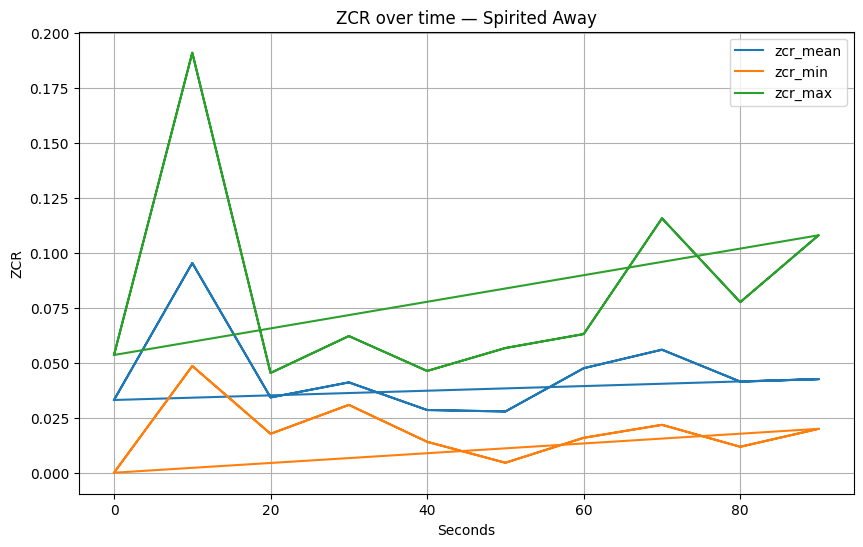

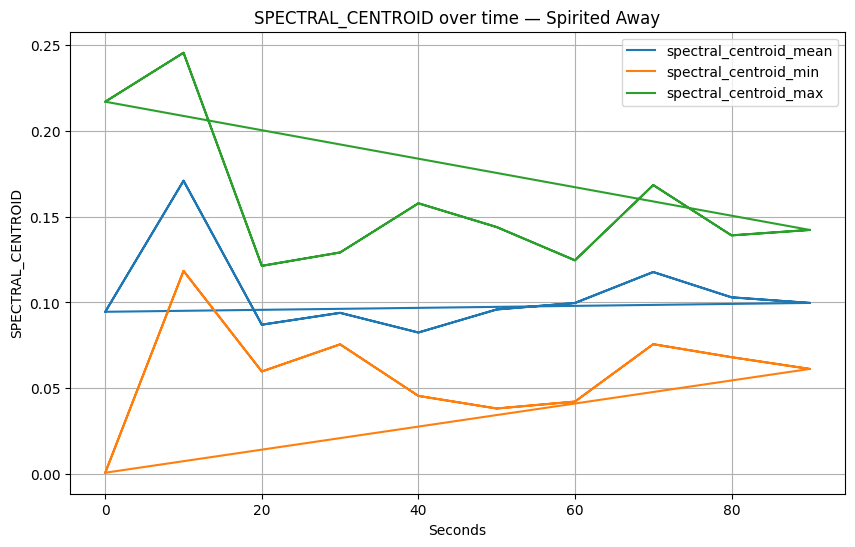

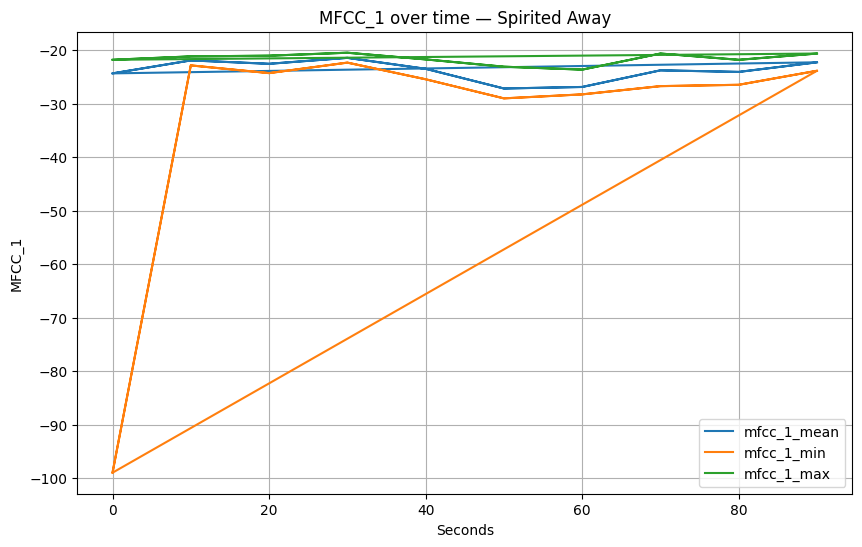

In [3]:
def plot_audio_feature(df, movie, feature_prefix):
    movie_df = df[df["movie"] == movie]
    plt.figure(figsize=(10,6))
    for suffix in ["mean", "min", "max"]:
        col = f"{feature_prefix}_{suffix}"
        if col in movie_df.columns:
            plt.plot(movie_df["seconds"], movie_df[col], label=col)
    plt.title(f"{feature_prefix.upper()} over time — {movie}")
    plt.xlabel("Seconds")
    plt.ylabel(feature_prefix.upper())
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_audio_feature(df, "Spirited Away", "zcr")
plot_audio_feature(df, "Spirited Away", "spectral_centroid")
plot_audio_feature(df, "Spirited Away", "mfcc_1")


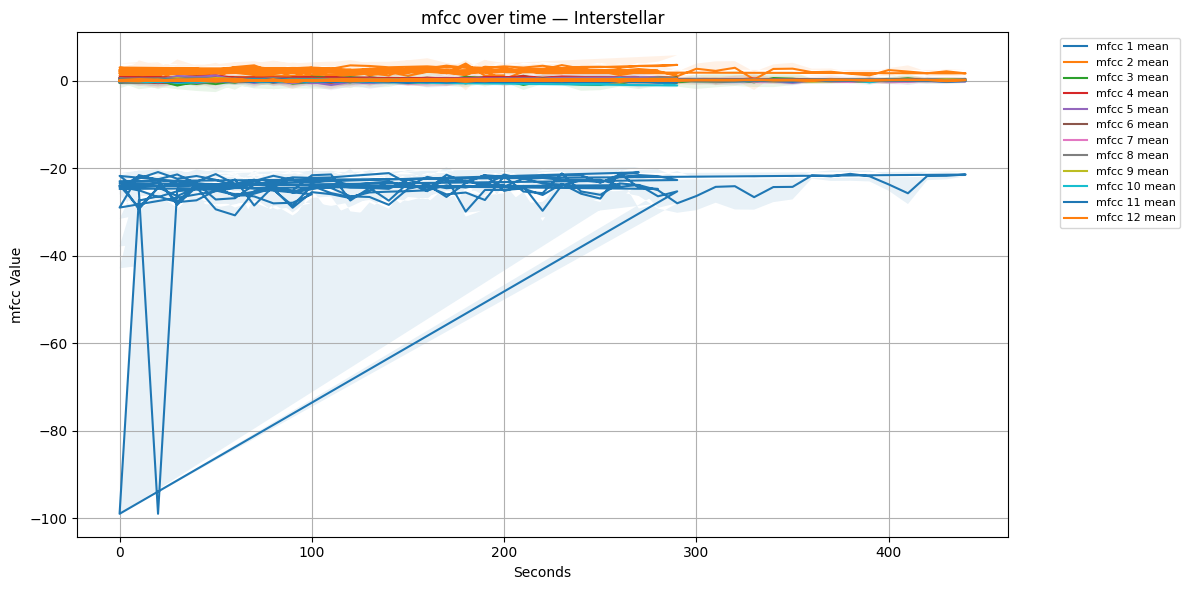

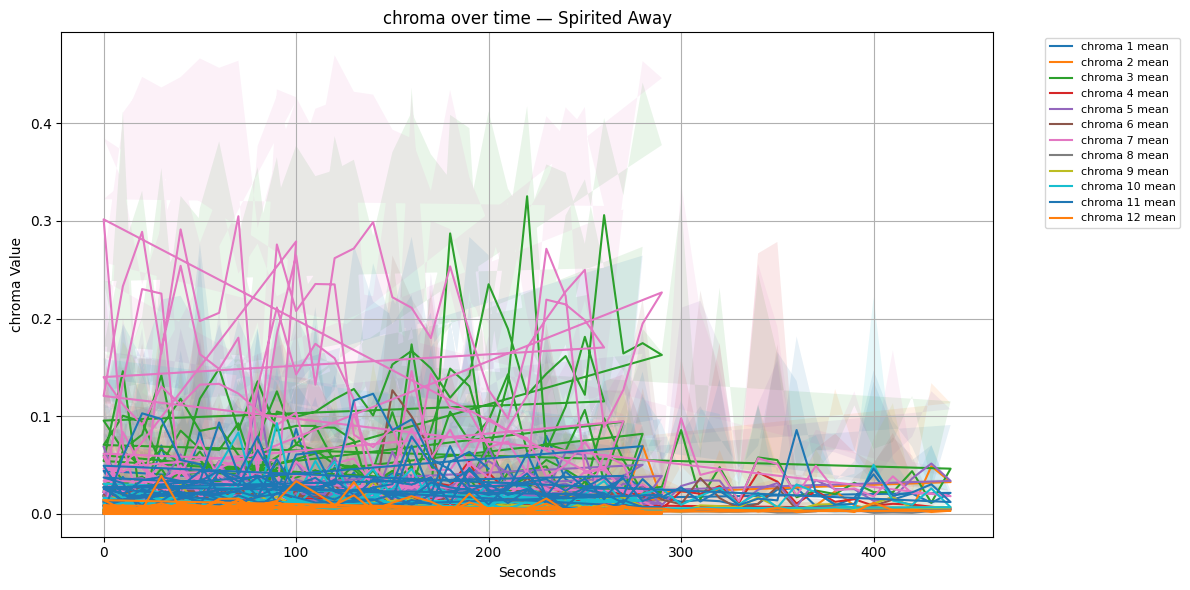

In [ ]:
def plot_multifeature(featurePrefix, movie_name):
    plt.figure(figsize=(12, 6))

    for i in range(1, 13):
        mean_col = f"{featurePrefix}_{i}_mean"
        min_col  = f"{featurePrefix}_{i}_min"
        max_col  = f"{featurePrefix}_{i}_max"

        plt.plot(df["seconds"], df[mean_col], label=f"{featurePrefix} {i} mean")
        plt.fill_between(df["seconds"],
                        df[min_col],
                        df[max_col],
                        alpha=0.1)

    plt.title(f"{featurePrefix} over time — {movie_name}")
    plt.xlabel("Seconds")
    plt.ylabel(f"{featurePrefix} Value")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_multifeature('mfcc', 'Interstellar')
plot_multifeature('chroma', 'Spirited Away')




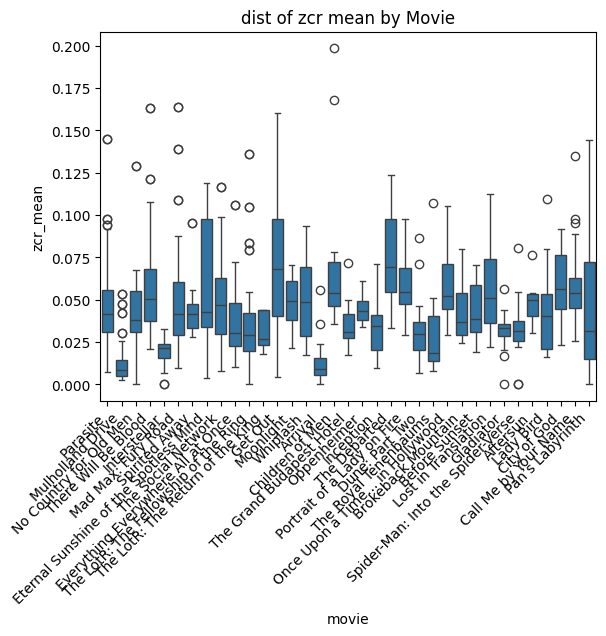

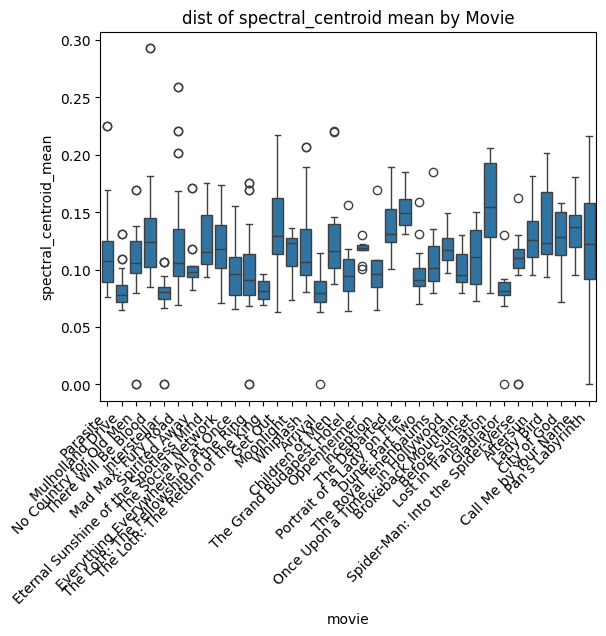

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
summary = df.groupby("movie").mean(numeric_only=True).reset_index()
def compare_feature(feature):
    sns.boxplot(data=df, x="movie", y=feature+"_mean")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"dist of {feature} mean by Movie")
    plt.show()
compare_feature('zcr')
compare_feature('spectral_centroid')

/var/folders/ns/rykfnvcd2m5290k7kpxhz2_m0000gn/T/ipykernel_41273/3265083993.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(summary["PCA1"][i]+0.02, summary["PCA2"][i], name, rotation=45, size = 8)


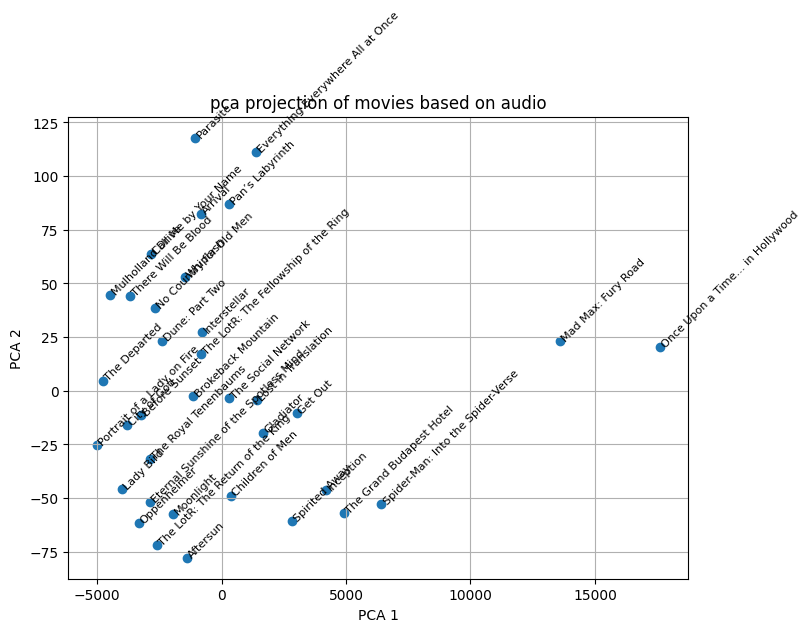

In [5]:
from sklearn.decomposition import PCA


summary = df.groupby("movie").mean()

pca = PCA(n_components=2)
pca_coords = pca.fit_transform(summary)
summary["PCA1"] = pca_coords[:,0]
summary["PCA2"] = pca_coords[:,1]

plt.figure(figsize=(8,6))
plt.scatter(summary["PCA1"], summary["PCA2"])

for i, name in enumerate(summary.index):
    plt.text(summary["PCA1"][i]+0.02, summary["PCA2"][i], name, rotation=45, size = 8)

plt.title("pca projection of movies based on audio")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


